In [132]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [133]:
from sklearn.datasets import load_breast_cancer

In [134]:
df = load_breast_cancer()

In [135]:
print(type(df))

<class 'sklearn.utils.Bunch'>


In [136]:
features = df.feature_names
target = df.target_names

In [137]:
print(features)
print(target)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [138]:
X = df.data
Y = df.target

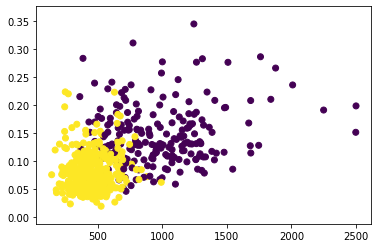

In [139]:
plt.scatter(X[:, 3],  X[:, 5], c = Y);

In [140]:
X = np.vstack((X[:, 3],X[:, 5])).T

In [141]:
print(X.shape)

(569, 2)


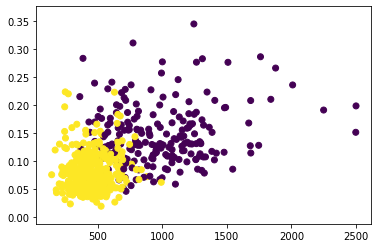

In [142]:
plt.scatter(X[:, 0],  X[:, 1], c = Y);

### Normalizing the data 

In [143]:
mean = np.mean(X[:, 0])
sigma = np.std(X[:, 0])
X[:, 0] = (X[:, 0] - mean)/sigma

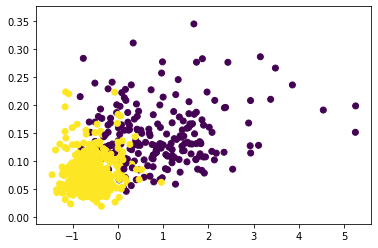

In [144]:
plt.scatter(X[:, 0],  X[:, 1], c = Y);

### splitting the data 

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [147]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(398, 2) (171, 2)
(398,) (171,)


In [152]:
ones = np.ones((X.shape[0], 1))
X = np.hstack((ones, X))

In [153]:
print(X[:4])

[[ 1.          0.9843749   0.2776    ]
 [ 1.          1.90870825  0.07864   ]
 [ 1.          1.55888363  0.1599    ]
 [ 1.         -0.76446379  0.2839    ]]


### Model 

In [155]:
def sigmoid(z):
    return (1 /(1 + np.exp(-z)))

def hypothesis(theta, x):
    return sigmoid(np.dot(theta.T, x))

def gradient(x,y, theta):
    grad = 0.0
    m = x.shape[0]
    for i in range(m):
        y_hat = hypothesis(X[i],theta)
        x = X[i].reshape((-1,1))
        grad += (Y[i] - y_hat)*x
    
    return grad

def getTheta(x, y, learning_rate = 0.0001):
    theta = np.zeros((X.shape[1],1))
    
    for i in range(200):
        theta = theta + learning_rate*gradient(x, y, theta)
    return theta


In [156]:
theta = getTheta(X_train, Y_train)

In [157]:
theta

array([[ 0.24055438],
       [-1.41577516],
       [-0.06675103]])

In [158]:
def predict(xtest,theta):
    prob = hypothesis(xtest,theta)
    if prob<=0.5:
        return 0
    else:
        return 1

In [159]:
ones = np.ones((X_test.shape[0], 1))
X_test = np.hstack((ones, X_test))

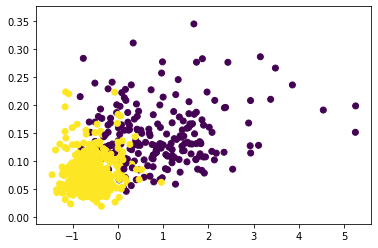

In [163]:
plt.scatter(X[:, 1],  X[:, 2], c = Y);

(10,)


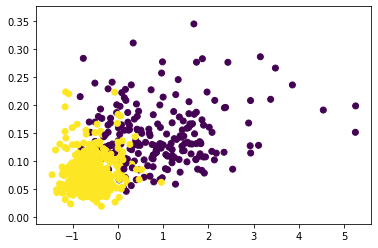

In [178]:
def drawLine():
#     plt.figure(figsize=(5,5))
    x = np.linspace(-1,2,10)
    print(x.shape)
    y = -(theta[0,0]*1 + theta[1,0]*x)/theta[2,0]
    plt.scatter(X[:,1],X[:,2],c=Y)
    
#     plt.plot(x,y)
    
drawLine()